In [1]:
# Import the necessary modules
import tensorflow as tf
import sys
sys.path.append('model')
from unicycle import mnist_benchmark, mnist_tfutils, Unicycle
import matplotlib
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from random import randint
from utility_functions import fetch_node

In [2]:
import tf_convmnist as convmnist

In [3]:
# Import MNIST data
batch_size = 256

# mnist variable is an instance of the DataSet class.
mnist = input_data.read_data_sets("MNIST_data/")
mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f14c46f3e90>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f14293be510>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f14293be550>)

# Import MNIST data
batch_size = 256

# mnist variable is an instance of the DataSet class.
mnist = input_data.read_data_sets("MNIST_data/")
mnist

In [4]:
#check that the data is correct
print 'Number of training images with shape %s: %s' % \
    (list(np.shape(mnist.train.images)[1:]),np.shape(mnist.train.images)[0])
print 'Number of training labels: %s' % \
    (np.shape(mnist.train.labels)[0])
print
print 'Number of test images with shape %s: %s' % \
    (list(np.shape(mnist.test.images)[1:]),np.shape(mnist.test.images)[0])
print 'Number of test labels: %s' % \
    (np.shape(mnist.test.labels)[0])
print
print 'Number of validation images with shape %s: %s' % \
    (list(np.shape(mnist.validation.images)[1:]),np.shape(mnist.validation.images)[0])
print 'Number of validation labels: %s' % \
    (np.shape(mnist.validation.labels)[0])

Number of training images with shape [784]: 55000
Number of training labels: 55000

Number of test images with shape [784]: 10000
Number of test labels: 10000

Number of validation images with shape [784]: 5000
Number of validation labels: 5000


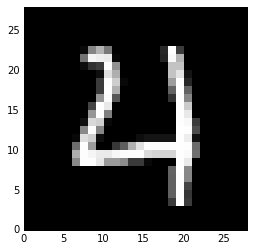

^ 4


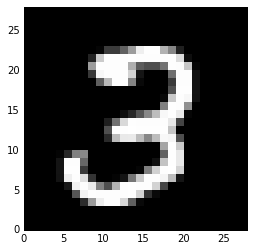

^ 3


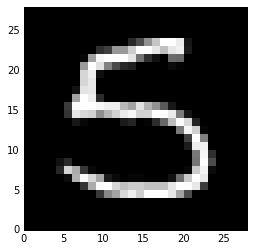

^ 5


In [5]:
#print out 3 examples of the data to really ensure it's correct
import numpy as NP
import matplotlib.pyplot as P
import matplotlib.ticker as MT
import matplotlib.cm as CM

def imagesc(W, pixwidth=1, ax=None, grayscale=True):
    """
    Do intensity plot, similar to MATLAB imagesc()
    W = intensity matrix to visualize
    pixwidth = size of each W element
    ax = matplotlib Axes to draw on 
    grayscale = use grayscale color map
    Rely on caller to .show()
    """
    # N = rows, M = column
    (N, M) = W.shape 
    # Need to create a new Axes?
    if(ax == None):
        ax = matplotlib.pyplot.figure().gca()
    # extents = Left Right Bottom Top
    exts = (0, pixwidth * M, 0, pixwidth * N)
    if(grayscale):
        ax.imshow(W,
                  interpolation='nearest',
                  cmap=matplotlib.cm.gray,
                  extent=exts)
    else:
        ax.imshow(W,
                  interpolation='nearest',
                  extent=exts)
        
    matplotlib.pyplot.show()
#     return ax


for _ in range(3):
    a=randint(1,1000)
    imagesc(np.reshape(mnist.train.images[a,:],(28,28))),
    print '^', mnist.train.labels[a]

In [6]:
#initialize the benchmark model
with tf.variable_scope("benchmark"):
    conv1_b, conv2_b, hidden_b, output_b = convmnist.model(tf.reshape(tf.constant(mnist.train.images[0:256]), (256, 28, 28, 1)))

In [7]:
#now let's initialize the unicycle model
with tf.variable_scope("unicycle"):
    unicycle_model = Unicycle()
    G = unicycle_model.build(json_file_name='sample_mnist_conv.json')
    last_ = unicycle_model({'images': tf.constant(mnist.train.images[0:256])}, G)

Unicycle Initialized

        Welcome to

$$\   $$\ $$\   $$\ $$$$$$\  $$$$$$\ $$\     $$\  $$$$$$\  $$\       $$$$$$$$\
$$ |  $$ |$$$\  $$ |\_$$  _|$$  __$$\\$$\   $$  |$$  __$$\ $$ |      $$  _____|
$$ |  $$ |$$$$\ $$ |  $$ |  $$ /  \__|\$$\ $$  / $$ /  \__|$$ |      $$ |
$$ |  $$ |$$ $$\$$ |  $$ |  $$ |       \$$$$  /  $$ |      $$ |      $$$$$\
$$ |  $$ |$$ \$$$$ |  $$ |  $$ |        \$$  /   $$ |      $$ |      $$  __|
$$ |  $$ |$$ |\$$$ |  $$ |  $$ |  $$\    $$ |    $$ |  $$\ $$ |      $$ |
\$$$$$$  |$$ | \$$ |$$$$$$\ \$$$$$$  |   $$ |    \$$$$$$  |$$$$$$$$\ $$$$$$$$\
 \______/ \__|  \__|\______| \______/    \__|     \______/ \________|\________|

        *The Universal Neural Interpretation and Cyclicity Engine


STEP 1
 JSON Import and Parse

Using JSON file SAMPLE_MNIST_CONV.JSON for import... done! 

Checking the integrity of the JSON file... done! 

STEP 2
 Network-X Raw Build

Building Network-X Raw DiGraph... 

Network-X Raw Graph created! Nodes: 
    conv_1
    conv_2
   

In [8]:
sess = tf.Session()

In [9]:
# Initialize all the variables now that they model graphs are constructed
sess.run(tf.global_variables_initializer())

In [10]:
#let's check the variable names -- we should see variables for both the benchmark and the unicycle models
vars = tf.global_variables()
print ([_v.name for _v in vars])

[u'benchmark/conv1w:0', u'benchmark/Variable:0', u'benchmark/conv2w:0', u'benchmark/Variable_1:0', u'benchmark/fc1w:0', u'benchmark/Variable_2:0', u'benchmark/fc2w:0', u'benchmark/Variable_3:0', u'unicycle/weights_fc_1:0', u'unicycle/biases_fc_1:0', u'unicycle/decay_param_fc_1:0', u'unicycle/weights_output_1:0', u'unicycle/biases_output_1:0', u'unicycle/decay_param_output_1:0', u'unicycle/filter_tensor_conv_1__f0:0', u'unicycle/conv_bias_conv_1__f0:0', u'unicycle/decay_param_conv_1:0', u'unicycle/filter_tensor_conv_2__f0:0', u'unicycle/conv_bias_conv_2__f0:0', u'unicycle/decay_param_conv_2:0']


In [11]:
conv1_bv, conv1_filt_bv, conv2_bv, conv2_filt_bv, output_bv = sess.run([conv1_b, vars[0], conv2_b, vars[2], output_b])

In [12]:
# actually run the unicycle model
conv1_tv, conv2_tv, hidden_tv, output_tv, conv1_filt_tv, conv2_filt_tv = sess.run([G.node['conv_1']['tf_cell'].get_state(), 
                                                      G.node['conv_2']['tf_cell'].get_state(),
                                                      G.node['fc_1']['tf_cell'].get_state(),
                                                      G.node['output_1']['tf_cell'].get_state(),
                                                              vars[14], vars[17]])

In [18]:
np.abs(conv1_tv - conv1_bv).max()

0.0

In [19]:
np.abs(conv2_tv - conv2_bv).max()

0.0

In [17]:
np.abs(output_tv - output_bv).max()

0.0

In [16]:
#are the loss-per-image vectors the same?
loss_b = tf.nn.sparse_softmax_cross_entropy_with_logits(output_b, np.int_(mnist.train.labels[0:256]))
loss_t = tf.nn.sparse_softmax_cross_entropy_with_logits(G.node['output_1']['tf_cell'].get_state(), np.int_(mnist.train.labels[0:256]))
loss_bv, loss_tv = sess.run([loss_b, loss_t])
np.abs(loss_bv - loss_tv)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0